In [1]:
from torch.utils.data import Dataset, DataLoader,random_split, SubsetRandomSampler
from training.dataset import TrainDataset, TestDataset, img_transform
import torch
import pandas as pd
import os
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter
import random
from sklearn.metrics import f1_score

In [2]:
a = [1,2,3,0]
b = [2,1,3,0]
a = torch.Tensor([1,2,1,0])
b = torch.Tensor([2,1,3,0])
f1_score(a,b,average='micro')

0.25

In [2]:
train_root = '/opt/ml/input/data/train/images'
test_root = '/opt/ml/input/data/eval/images'

In [4]:
# pd.read_csv(os.path.join(meta_root, 'train.csv'))

In [3]:
data = TrainDataset(train_root, transform = img_transform())


In [6]:
img, label = data.__getitem__(35)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


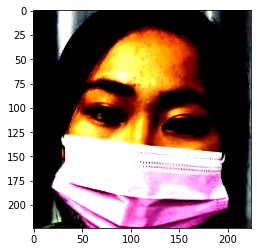

In [7]:
#img.show() 는 주피터노트북에서는 안나옴
plt.imshow(img.permute(1,2,0).numpy())

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


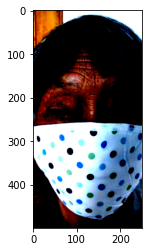

In [4]:
img, label = data.__getitem__(180)
plt.imshow(img.permute(1,2,0).numpy())

In [8]:
img.size()

torch.Size([3, 358, 224])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


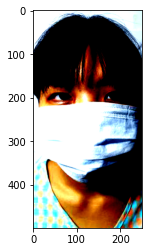

In [5]:
img, label = data.__getitem__(100)
plt.imshow(img.permute(1,2,0).numpy())

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


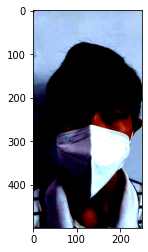

In [6]:
img, label = data.__getitem__(45)
plt.imshow(img.permute(1,2,0).numpy())

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


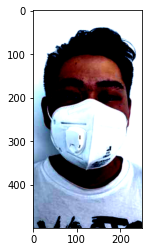

In [7]:
img, label = data.__getitem__(150)
plt.imshow(img.permute(1,2,0).numpy())

In [12]:
len(data)

18900

In [13]:
len(data.label_list)

18900

In [14]:
len(data.img_list)

18900

In [15]:
train, val = random_split(data, [int(len(data)*0.8), int(len(data)*0.2)])

<BarContainer object of 18 artists>

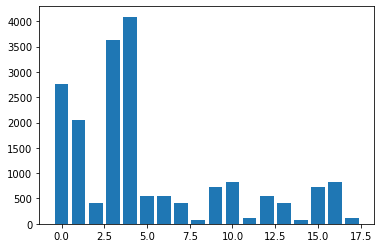

In [4]:
c = Counter(data.label_list)
plt.bar(c.keys(), c.values())

In [17]:
sorted(c.items())

[(0, 2770),
 (1, 2045),
 (2, 415),
 (3, 3635),
 (4, 4090),
 (5, 545),
 (6, 554),
 (7, 409),
 (8, 83),
 (9, 727),
 (10, 818),
 (11, 109),
 (12, 554),
 (13, 409),
 (14, 83),
 (15, 727),
 (16, 818),
 (17, 109)]

In [5]:
for i in range(len(c)):
    c[i] /=len(data.label_list)
sorted(c.items())

[(0, 0.14656084656084656),
 (1, 0.1082010582010582),
 (2, 0.021957671957671957),
 (3, 0.19232804232804232),
 (4, 0.2164021164021164),
 (5, 0.028835978835978836),
 (6, 0.029312169312169314),
 (7, 0.02164021164021164),
 (8, 0.004391534391534392),
 (9, 0.03846560846560847),
 (10, 0.04328042328042328),
 (11, 0.005767195767195767),
 (12, 0.029312169312169314),
 (13, 0.02164021164021164),
 (14, 0.004391534391534392),
 (15, 0.03846560846560847),
 (16, 0.04328042328042328),
 (17, 0.005767195767195767)]

In [18]:
meta = pd.read_csv('/opt/ml/input/data/train/train.csv')

In [19]:
age = meta['age'].unique()

In [20]:
np.sort(age)

array([18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60])

In [21]:
meta['age'].value_counts().sort_index()

18    192
19    407
20    267
21     41
22     58
23     72
24     62
25     82
26     44
27     15
28     25
29     16
30     17
31      3
32      7
33      5
34     13
35     19
36      8
37      3
38     14
39      6
40     20
41      7
42     13
43     18
44     13
45     27
46     14
47     10
48     39
49     31
50     80
51     63
52     78
53     64
54     82
55    100
56    123
57    106
58    159
59     85
60    192
Name: age, dtype: int64

In [22]:
temp = meta['age'].value_counts().sort_index()
c1 = 30
c2 = 52

res1 = res2 = res3 = 0
for i in range(18,c1):
    res1 += temp[i]

for i in range(c1, c2):
    res2 += temp[i]

for i in range(c2, 61):
    res3 += temp[i]
print(f'{res1}  {res2}  {res3}')

1281  430  989


In [23]:
test_data = TestDataset(test_root, None)

In [24]:
temp = np.array(data.label_list)

In [25]:
(temp==17).sum()

109

In [26]:
indices = list(range(len(data)))
split_idx = int(len(data) * 0.8)
train_idx, valid_idx = indices[:split_idx], indices[split_idx:]
# random.shuffle(train_idx)
# random.shuffle(valid_idx)

train_sampler = SubsetRandomSampler(train_idx)
valid_sampler = SubsetRandomSampler(valid_idx)

train_loader = DataLoader(data, batch_size=5, num_workers = 4, sampler=train_sampler, pin_memory=True, shuffle=False)
valid_loader = DataLoader(data, batch_size=1, num_workers = 4, sampler=valid_sampler, pin_memory=True, shuffle=False)

In [27]:
len(train_idx)

15120

In [28]:
sample_iter = iter(train_sampler)

In [29]:
l = []
for i in train_sampler:
    l.append(i)

In [30]:
l.sort()
l[-10:]

[15110, 15111, 15112, 15113, 15114, 15115, 15116, 15117, 15118, 15119]

In [31]:
len(l)

15120

In [32]:
i = 0
for img, lbl in train_loader:
    print(lbl)
    break

tensor([15,  4,  3,  4, 16])
